## 单变量线性回归
某金融公司在多次进行活动推广后，记录了活动推广费用及金融产品销售额数据，因为活动推广有明显效果，现在的需求是投入60万的推广费，能得到多少的销售额呢？

### 确定变量
- 问题：投入60万的推广费，能够带来多少的销售额？
- 自变量：推广费，因变量：销售额。

In [1]:
import numpy
import pandas as pd 
from matplotlib import pyplot as plt

data = pd.read_csv('03_1.csv')
data

,No.,Promotion_expense,Sale
0,1,19,60
1,2,45,113
2,3,35,94
3,4,31,90
4,5,25,60
5,6,32,88
6,7,21,59
7,8,26,61
8,9,24,57
9,10,27,78


### 确定类型
- 方法一：绘制散点图，确定回归模型类型，从散点图中确定二者是否线性相关。
- 方法二：求自变量（推广费）与因变量（销售额）之间的相关系数，进而确定二者是否线性相关。

,No.,Promotion_expense,Sale
No.,1.000000,-0.297891,-0.393672
Promotion_expense,-0.297891,1.000000,0.941814
Sale,-0.393672,0.941814,1.000000


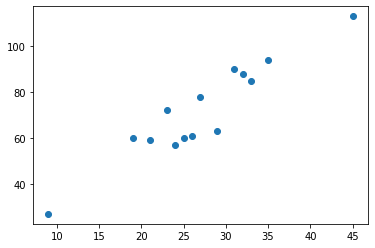

In [2]:
#plt.scatter(data.Promotion_expense, data.Sale)
plt.scatter(data['Promotion_expense'], data['Sale'])
data.corr()

### 建立模型

- 要建立回归模型 y = B + Ax，如何得到最佳的A和B，使得尽可能多的数据点落在或者更加靠近这条拟合出来的直线上呢？
- 方法就是最小二乘法，又称最小平方法，通过最小化误差的平方和寻找数据的最佳直线，这个误差就是实际观测点和估计点间的距离。

In [3]:
# (1) 首先导入简单线性回归的求解类LinearRegression，然后使用该类进行建模，得到lrModel的模型变量
# (2) 接着把自变量和因变量选择出来
# (3) 调用模型的fit方法，对模型进行训练这个训练过程，就是参数求解的过程，并对模型进行拟合

from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()

x = data[['Promotion_expense']]
y = data[['Sale']]

lrModel.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 模型检验
判定系数 = 相关系数R^2：表示拟合得到的模型能解释因变量变化的百分比，R^2越接近于1，表示回归模型拟合效果越好

In [4]:
lrModel.score(x, y)

0.8870135716304373

### 模型预测
调用模型的predict方法，使用sklearn进行简单线性回归的求解过程。

In [5]:
lrModel.predict([[60], [70]])

array([[150.0667131],
       [173.7963006]])

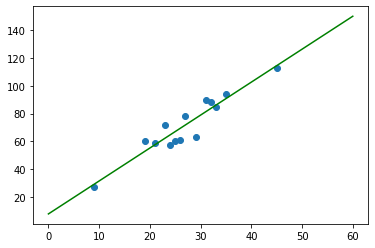

In [6]:
plt.scatter(data['Promotion_expense'], data['Sale'])

X2 = [[0], [30], [60]]
y2 = lrModel.predict(X2)
plt.plot(X2, y2, 'g-')

# plt.xlim(0, 60)
# plt.ylim(0, 150)
# plt.grid(True)
plt.show()

获取拟合的参数：使用模型的intercept属性查看参数B(截距)，使用coef属性查看参数A

In [7]:
B = lrModel.intercept_[0]      # get intercept: B
print("B =", B)

A = lrModel.coef_[0][0]        # get coeffient: A
print("A =", A)

print("Model: y = B + Ax = %f + %fX" % (B, A))

B = 7.689188143332572
A = 2.3729587493228075
Model: y = B + Ax = 7.689188 + 2.372959X


In [8]:
# 利用求出的参数 A 和 B 进行手动计算
y = B + A*numpy.array([60,70])
print(y)

[150.0667131 173.7963006]


## 多变量线性回归
某金融公司打算新开一类金融产品，现有9个金融产品的数据，包括用户购买金融产品的综合年化利率，以及公司收取用户的佣金（手续费）；如下表所示，产品利率为11％，佣金为50，我们需要预测这款金融产品的销售额？

### 确定变量
- 问题：产品利率为11％，佣金为50，我们需要预测这款金融产品的销售额？
- 因变量：销售额；自变量：利率、佣金

In [9]:
import numpy
import pandas as pd 
from matplotlib import pyplot as plt

dataset = pd.read_csv('03_2.csv')
dataset

,No._of_product,Interest_rate(%),Commission,Sale
0,1,9,75,500
1,2,7,30,370
2,3,7,20,375
3,4,5,30,270
4,5,6,0,360
5,6,7,21,379
6,7,8,50,440
7,8,6,20,300
8,9,9,60,510


### 确定类型
- 方法一：绘制散点图，确定回归模型类型，从散点图中确定二者是否线性相关。
- 方法二：求自变量（推广费）与因变量（销售额）之间的相关系数，进而确定二者是否线性相关。

,No._of_product,Interest_rate(%),Commission,Sale
No._of_product,1.000000,0.033457,-0.076234,0.038642
Interest_rate(%),0.033457,1.000000,0.808338,0.978818
Commission,-0.076234,0.808338,1.000000,0.763408
Sale,0.038642,0.978818,0.763408,1.000000


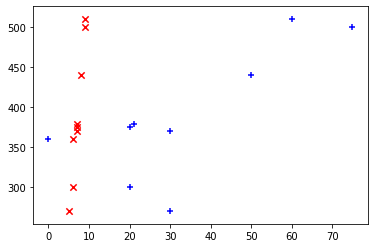

In [10]:
plt.scatter(dataset["Interest_rate(%)"], dataset["Sale"], marker = 'x', color = 'red', s = 40)
plt.scatter(dataset["Commission"], dataset["Sale"], marker = '+', color = 'blue', s = 40)
dataset.corr()

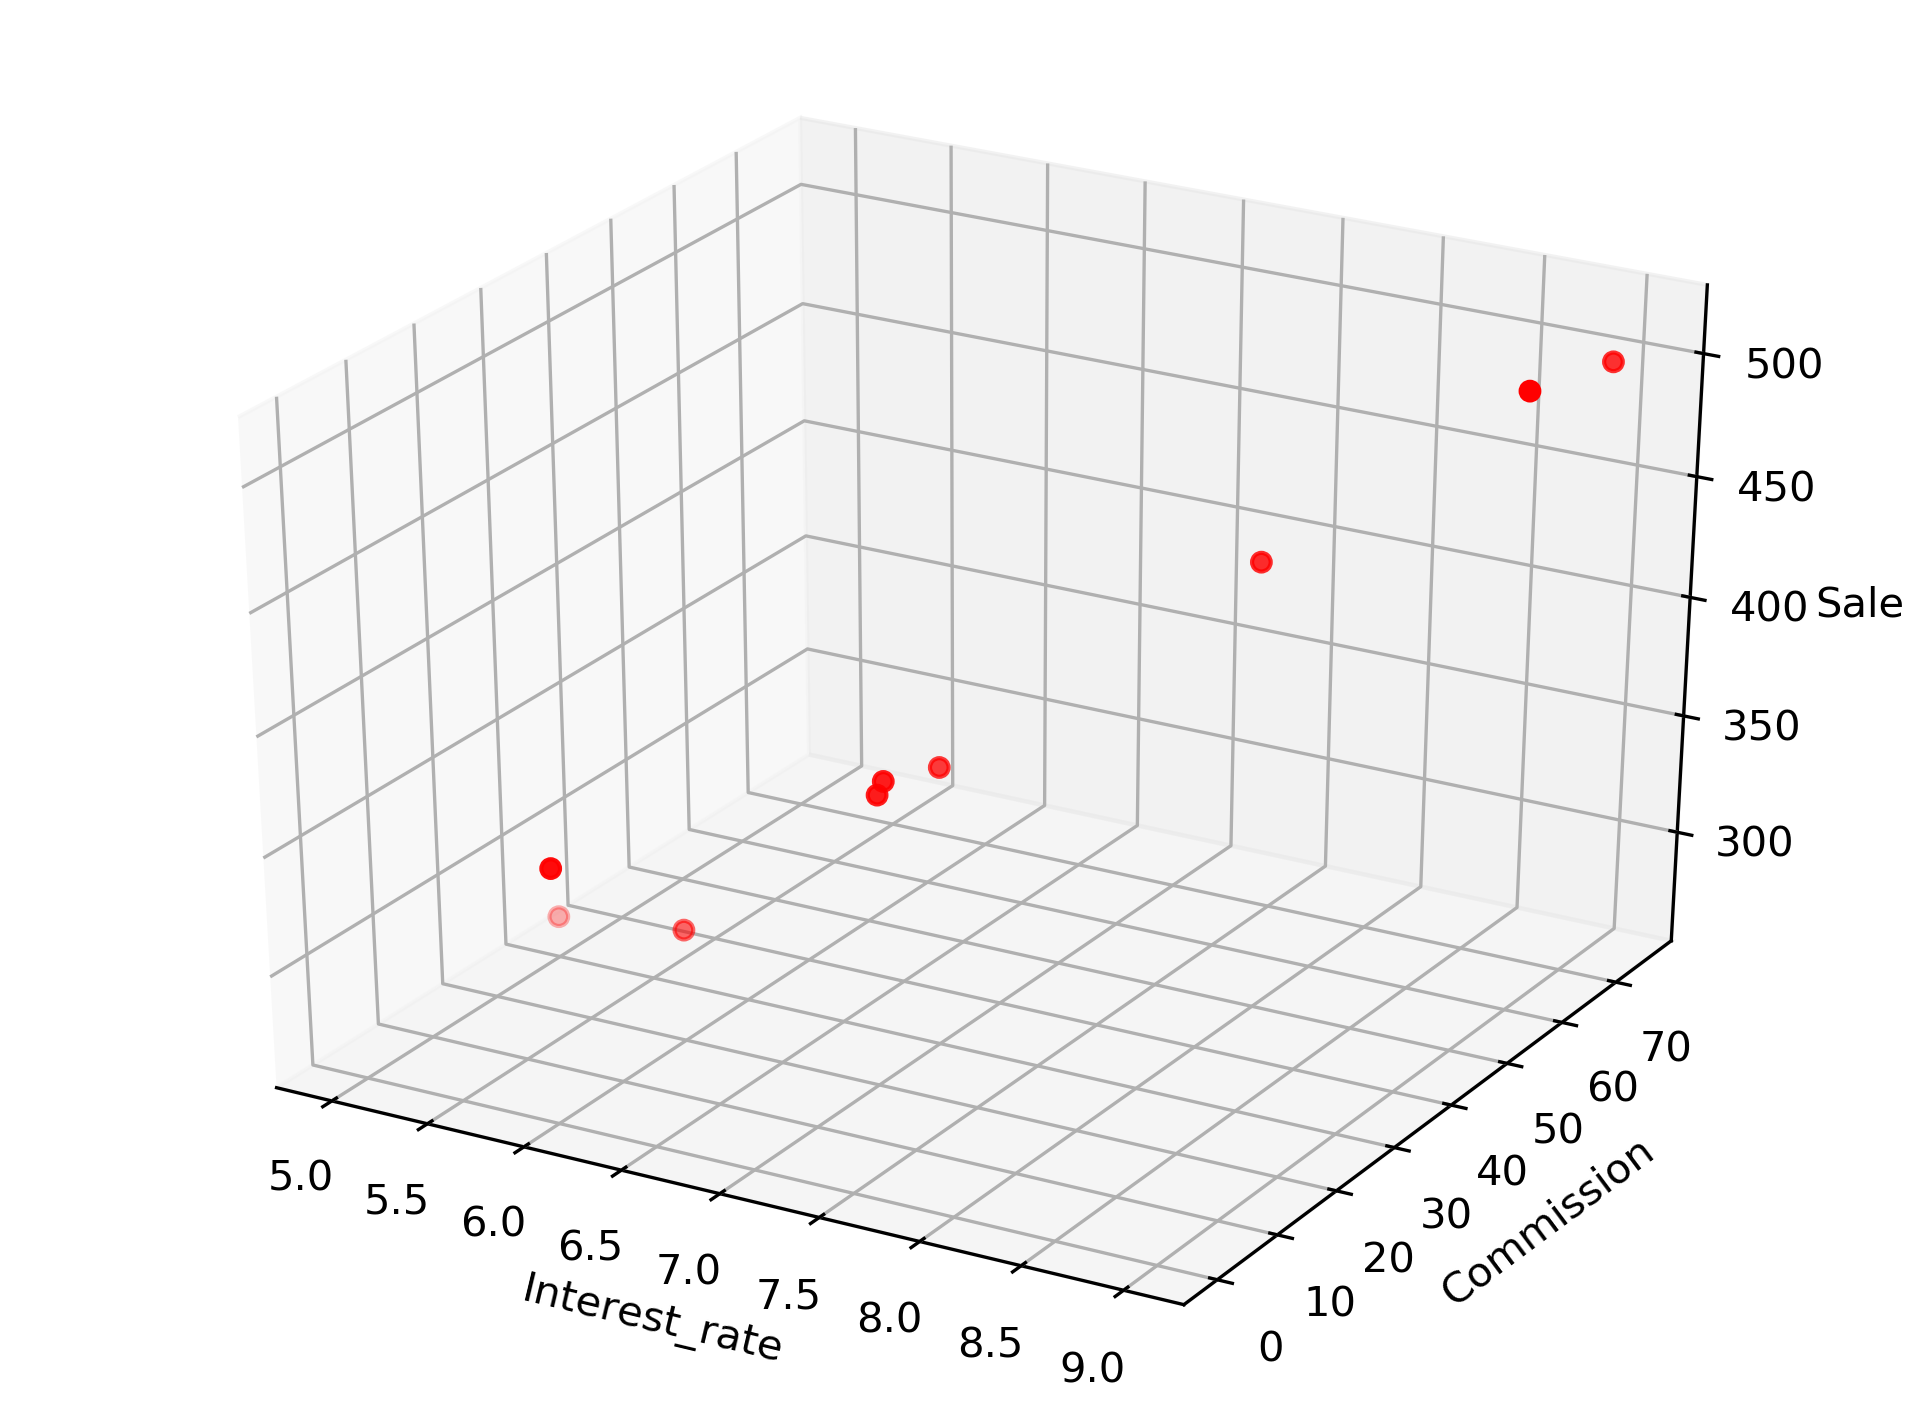

In [11]:
import numpy
from mpl_toolkits.mplot3d import Axes3D
 
# ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
fig = plt.figure(figsize = (8, 6), dpi = 300)
ax = fig.add_subplot(projection='3d')

ax.scatter(dataset["Interest_rate(%)"], dataset["Commission"], dataset["Sale"], c='r')   
ax.set_zlabel('Sale') 
ax.set_ylabel('Commission')
ax.set_xlabel('Interest_rate')
plt.show()

### 建立模型

In [12]:
# (1) 首先导入简单线性回归的求解类LinearRegression，然后使用该类进行建模，得到lrModel的模型变量
# (2) 接着把自变量和因变量选择出来
# (3) 调用模型的fit方法，对模型进行训练这个训练过程，就是参数求解的过程，并对模型进行拟合

from sklearn.linear_model import LinearRegression
lrModel = LinearRegression()

x = dataset[["Interest_rate(%)","Commission"]]
y = dataset[["Sale"]]

lrModel.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 模型检验
判定系数 = 相关系数R^2：表示拟合得到的模型能解释因变量变化的百分比，R^2越接近于1，表示回归模型拟合效果越好

In [13]:
lrModel.score(x, y)

0.960315344209031

### 模型预测
调用模型的predict方法，使用sklearn进行简单线性回归的求解过程。

In [14]:
lrModel.predict([[11, 50]])

array([[627.33389606]])

获取拟合的参数：使用模型的intercept属性查看参数B(截距)，使用coef属性查看参数A

In [15]:
A = lrModel.coef_              #查看参数
print(lrModel.coef_)

B = lrModel.intercept_         #查看截距
print(lrModel.intercept_)

print("Model: y = %f + %f X1 + %f X2" % (B, A[0][0], A[0][1]))

[[62.35235754 -0.28005173]]
[-44.5394503]
Model: y = -44.539450 + 62.352358 X1 + -0.280052 X2


In [16]:
# 利用求出的参数 A 和 B 进行手动计算
y = B + A[0][0]*numpy.array([11]) + A[0][1]*numpy.array([50])
print(y)

[627.33389606]


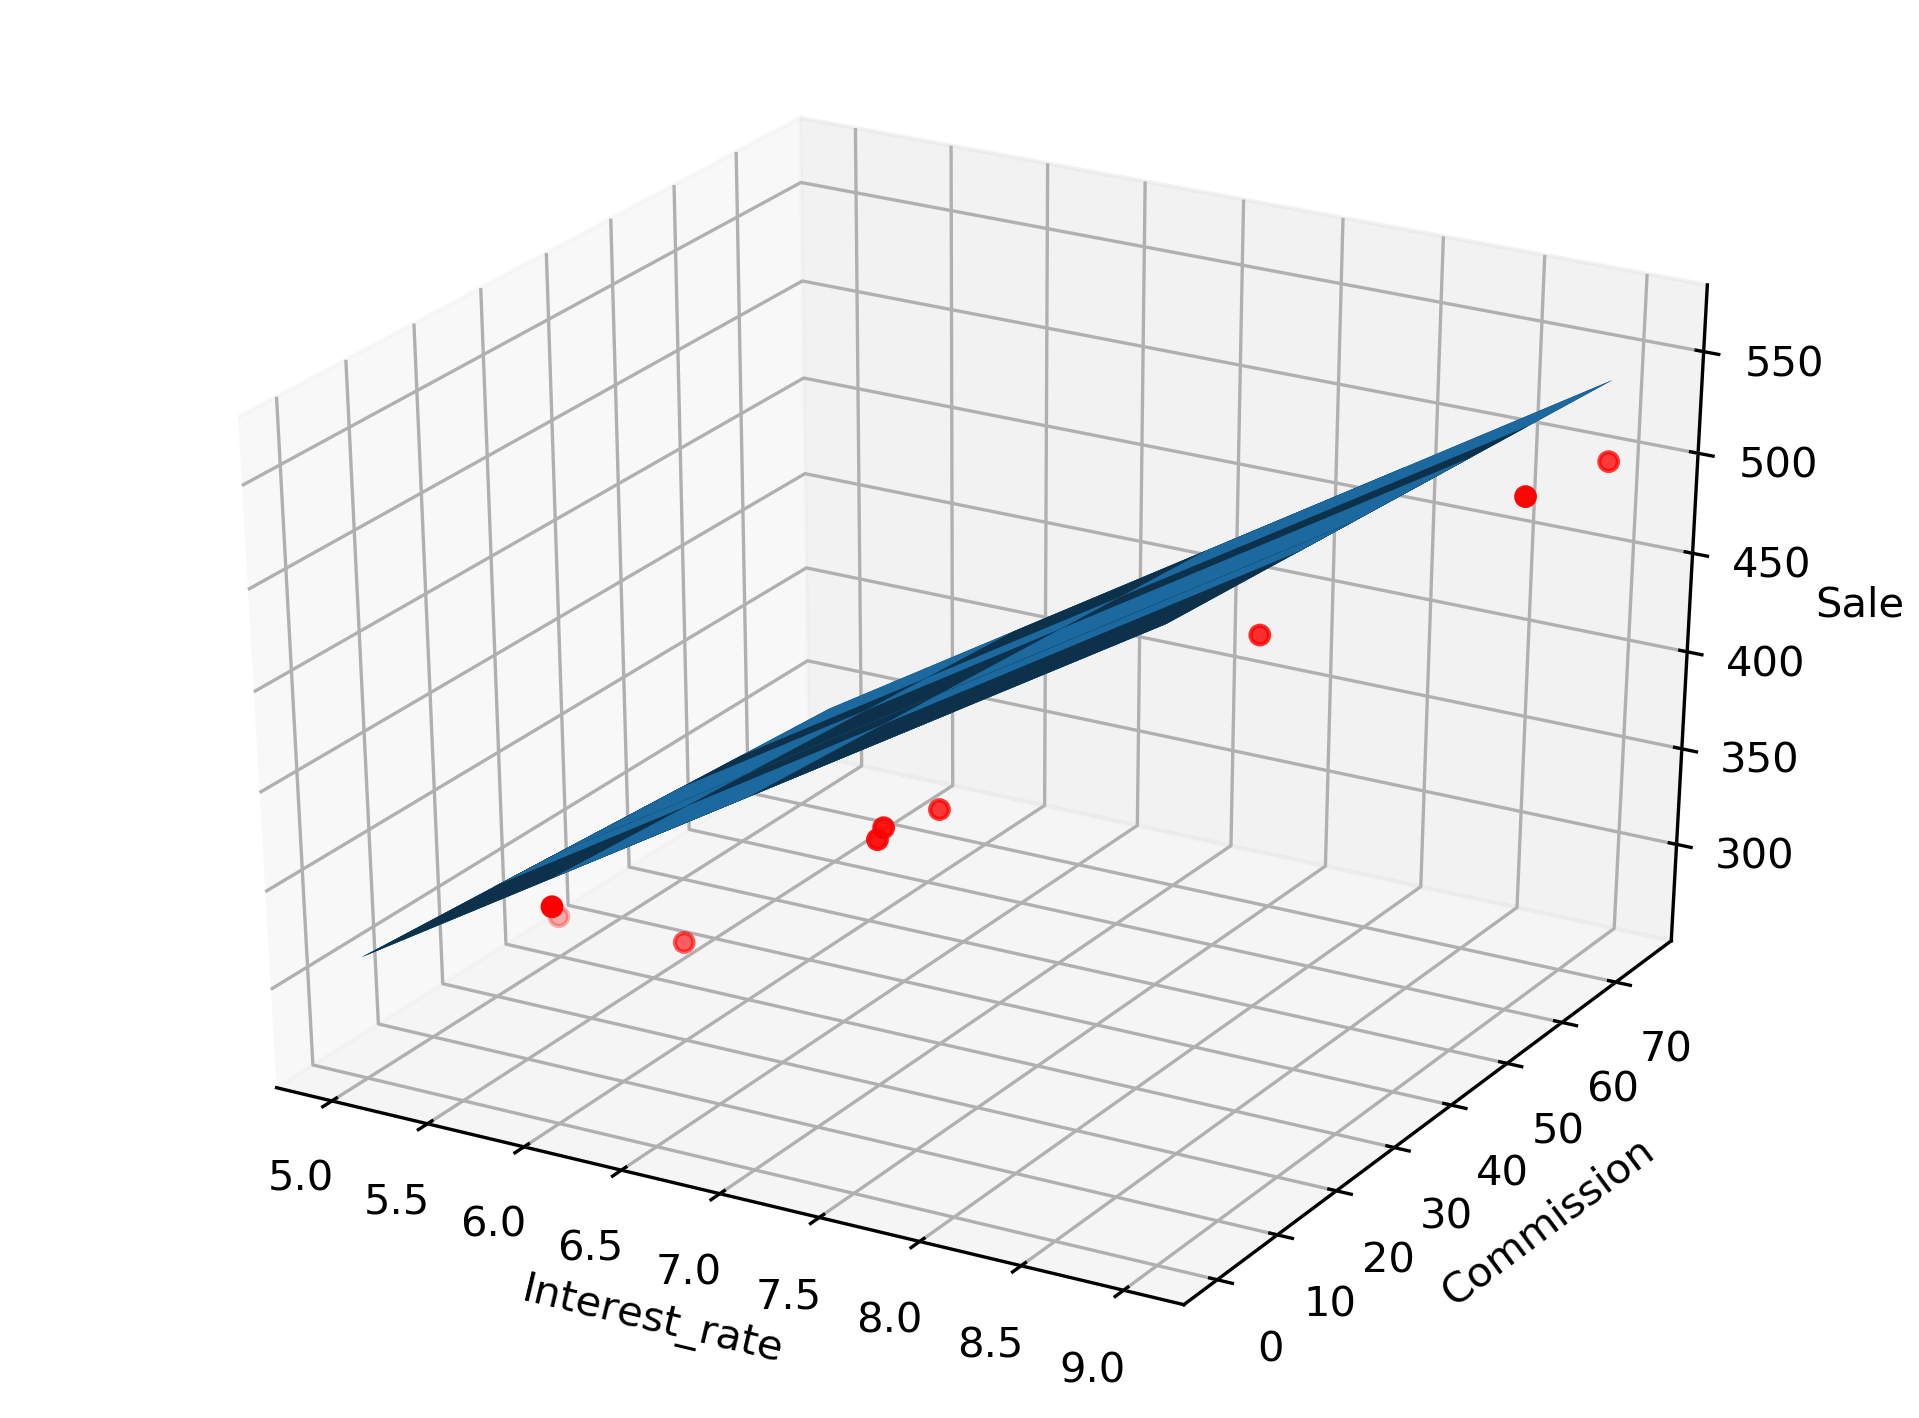

In [17]:
import numpy
#from mpl_toolkits.mplot3d import Axes3D

# ax = plt.subplot(projection='3d')  # 创建一个三维的绘图工程
fig = plt.figure(figsize = (8, 6), dpi = 300)
ax = fig.add_subplot(projection='3d')

X = dataset["Interest_rate(%)"]
Y = dataset["Commission"]
X, Y = numpy.meshgrid(X, Y)
Z = 62.352358*X - 0.280052*Y

ax.plot_surface(X, Y, Z)
ax.scatter(dataset["Interest_rate(%)"], dataset["Commission"], dataset["Sale"], c='r')   

ax.set_zlabel('Sale') 
ax.set_ylabel('Commission')
ax.set_xlabel('Interest_rate')
plt.show()

## sklearn建模流程（建训评测）
1. 建立模型: lrModel = sklearn.linear_model.LinearRegression()

2. 训练模型: rModel.fit(x,y)

3. 模型评估: lrModel.score(x,y)

4. 模型预测: lrModel.predict(x)